# SOMS Temp Maps - alternate configs

In [1]:
import sys
import numpy as np
import scipy as sp
import netCDF4 as nc4
import matplotlib.pyplot as plt
import xarray as xr
import dask.array as da
import pandas as pd
#from glob import glob
import glob

import numpy.linalg as linalg
import scipy.signal as signal
import scipy.ndimage as ndimage
import scipy.interpolate as interpolate

from netCDF4 import Dataset

from itertools import repeat

# import sys
# sys.path.insert(0, '../eddyTracking/ecjoliver/')
# import params 

import re

from scipy.io.netcdf import netcdf_file as netcdf
import cmocean.cm as cmo
import warnings
import matplotlib.colors as colors
from cartopy import crs as ccrs, feature as cfeature



In [2]:
# import copy
# sys.path.insert(0, '/home/tsmith/scratch/SOMS_equal/')
# from SOMS_code import *
# from RegridderPLUS import *

In [3]:
# import datetime
# import netCDF4

In [2]:
%matplotlib inline

In [3]:
def find_ind(grid1d, coord):
        a=abs(grid1d-coord)
        return np.where(a==np.min(a))[0][0]

## Load SOM files

In [101]:
grid_2x2 = xr.open_mfdataset('.../SOMS_Data_2x2.nc')
grid_3x2 = xr.open_mfdataset('.../SOMS_Data_3x2.nc')
grid_4x3 = xr.open_mfdataset('.../SOMS_Data_4x3.nc')


In [102]:
TempC_2x2 = grid_2x2['Temperature_C']
TempC_3x2 = grid_3x2['Temperature_C']
TempC_4x3 = grid_4x3['Temperature_C']
#TempC_5x5 = grid_5x5C['Temp']


In [103]:
Temp_anomC_2x2 = grid_2x2['Temperature_anomaly_C']
Temp_anomC_3x2 = grid_3x2['Temperature_anomaly_C']
Temp_anomC_4x3 = grid_4x3['Temperature_anomaly_C']
#Temperature_anomaly_C_5x5 = grid_5x5_Temperature_anomaly_C['Temperature_anomaly_']

In [104]:
TempA_2x2 = grid_2x2['Temperature_A']
TempA_3x2 = grid_3x2['Temperature_A']
TempA_4x3 = grid_4x3['Temperature_A']
#TempA_5x5 = grid_5x5_TempA['Temp']


In [105]:
Temp_anomA_2x2 = grid_2x2['Temperature_anomaly_A']
Temp_anomA_3x2 = grid_3x2['Temperature_anomaly_A']
Temp_anomA_4x3 = grid_4x3['Temperature_anomaly_A']
#Temp_anomA_5x5 = grid_5x5_Temp_anomA['Temp_anom']

In [106]:
radA_2x2 = grid_2x2['Radius_A']
radA_3x2 = grid_3x2['Radius_A']
radA_4x3 = grid_4x3['Radius_A']

In [107]:
radC_2x2 = grid_2x2['Radius_C']
radC_3x2 = grid_3x2['Radius_C']
radC_4x3 = grid_4x3['Radius_C']

In [108]:
# radC_array2x2 = radC_array2x2.values
# radC_array3x2 = radC_array3x2.values
# radC_array4x3 = radC_array4x3.values
# radC_array5x5 = radC_array5x5.values

In [109]:
depth = grid_2x2['depth']

In [110]:
# radA_array = Rad_A.values
# radC_array = Rad_C.values

In [111]:
radA_2x2 = radA_2x2.values
radC_2x2 = radC_2x2.values


In [112]:
radA_3x2 = radA_3x2.values
radC_3x2 = radC_3x2.values


In [113]:
radA_4x3 = radA_4x3.values
radC_4x3 = radC_4x3.values


### Find limits

In [114]:
lim_spec = np.arange(-352.5,353,7.5)

## CONFIG 2x2

In [115]:
x1 = find_ind(lim_spec,-4*np.max(np.concatenate([radC_2x2,radA_2x2])))

In [116]:
x2 = find_ind(lim_spec,4*np.max(np.concatenate([radC_2x2,radA_2x2])))

In [117]:
lim=47-x1

In [118]:
lim_specC = lim_spec[47-lim:48+lim]

In [119]:
#divmod(0,2)

In [120]:
#divmod(8,3)

In [121]:
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

Text(0.03, 0.4, 'Distance (km)')

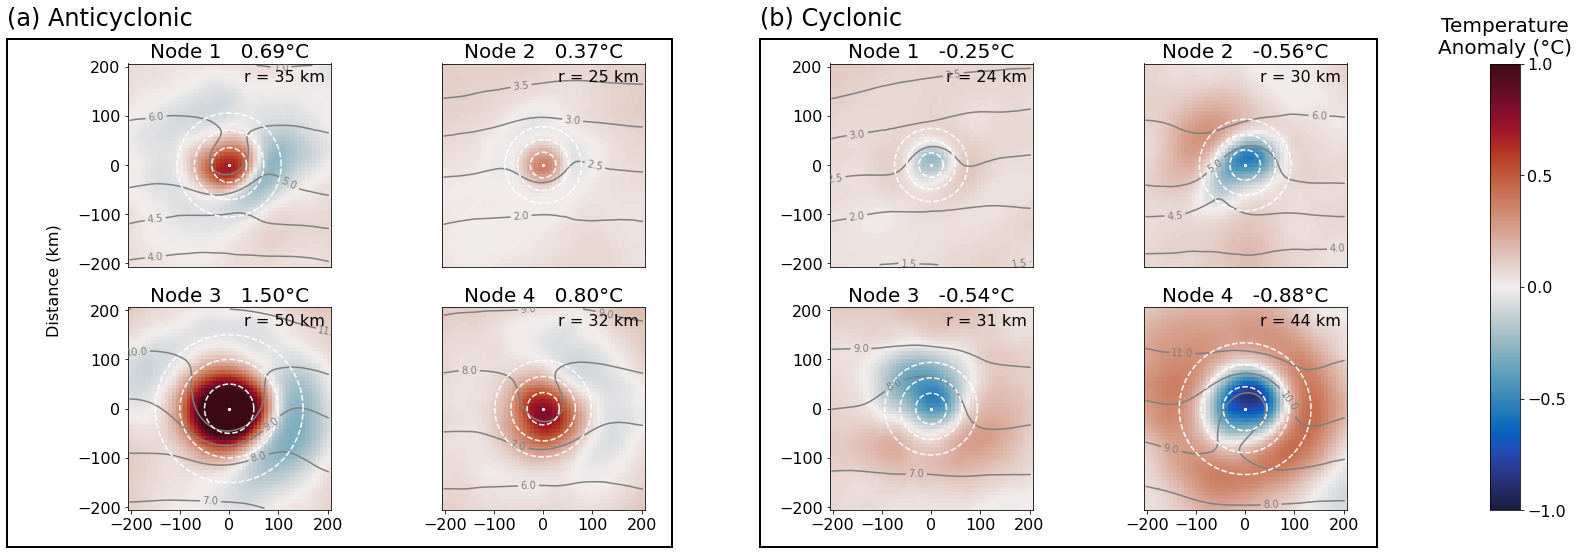

In [122]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 7.5),facecolor='w')
outer_grid = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

angle = np.linspace(0,2*np.pi,150)

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(2, 2, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.2)
for k in range(4):
    row, col = divmod(k, 2)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            Temp_anomA_2x2[k,0,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -1, vmax= 1
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 1 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    ax.set_title("Node %i   %.2f°C" % (k+1, Temp_anomA_2x2[k,0,:,:].max(('y','x'))),fontsize=20)
    #ax.set_title("Node {:<2d}{:>10.2f}°C".format(k+1, float(Temp_anomA[k,0,:,:].max(('y','x')))))
    
    ax.text(0.97, 0.97, 'r = %i km' %(radA_2x2[k]), transform=ax.transAxes, ha='right', va='top')
    
    #ax.text(0.9, 0.1, 'di = %i%%' %dipoleA[k], transform=ax.transAxes, ha='right', va='top')
    
    
    #CIRCLE 1rad
    x=(radA_2x2[k])*np.cos(angle)
    y=(radA_2x2[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radA_2x2[k])*np.cos(angle)
    y2=2*(radA_2x2[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radA_2x2[k])*np.cos(angle)
    y3=3*(radA_2x2[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,lim_specC, 
                            TempA_2x2[k,0,47-lim:48+lim,47-lim:48+lim],   
                     levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,9,10,11,12,13,14],
#                         ,levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
#        2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the first grid
rect = Rectangle((0.005, 0.005), 0.42, 0.94, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(2, 2, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.2)
for k in range(4):
    row, col = divmod(k, 2)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            Temp_anomC_2x2[k,0,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -1, vmax= 1
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 1 else [])
    ax.set_title("Node %i   %.2f°C" % (k+1, Temp_anomC_2x2[k,0,:,:].min(('y','x'))),fontsize=20)
    
    ax.text(0.97, 0.97, 'r = %i km' %(radC_2x2[k]), transform=ax.transAxes, ha='right', va='top')
    
    #CIRCLE 1rad
    x=(radC_2x2[k])*np.cos(angle)
    y=(radC_2x2[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radC_2x2[k])*np.cos(angle)
    y2=2*(radC_2x2[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radC_2x2[k])*np.cos(angle)
    y3=3*(radC_2x2[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,lim_specC, 
                    TempC_2x2[k,0,47-lim:48+lim,47-lim:48+lim],  
                     levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,9,10,11,12,13,14],
                   # levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,13,14],
#                         ,levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
#        2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
rect = Rectangle((0.48, 0.005), 0.39, 0.94, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Add colorbar
cbar_ax = fig.add_subplot(outer_grid[2])
cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
                    #label='Temp anomaly °C',
                    shrink=1,aspect=20)
cbar.set_ticks([-1,-0.5, 0.,0.5, 1])
cbar.ax.tick_params(labelsize=16)
cbar_ax.set_title('Temperature\nAnomaly (°C)',pad=10,fontsize=20)
#cbar.set_label('Temp anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(left=0.055)
plt.subplots_adjust(top=0.9)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.97, '(a) Anticyclonic', fontsize=24, fontweight='normal')
fig.text(0.48, 0.97, '(b) Cyclonic', fontsize=24, fontweight='normal')
fig.text(0.03,0.4, 'Distance (km)',rotation='vertical',fontsize=16)


#plt.savefig('../Temp_surface_SOM2x2_FigureS3.png', dpi=500)

## Config 3x2

In [123]:
x1 = find_ind(lim_spec,-4*np.max(np.concatenate([radC_3x2,radA_3x2])))

x2 = find_ind(lim_spec,4*np.max(np.concatenate([radC_3x2,radA_3x2])))

In [124]:
lim=47-x1

lim_specC = lim_spec[47-lim:48+lim]



Text(0.01, 0.4, 'Distance (km)')

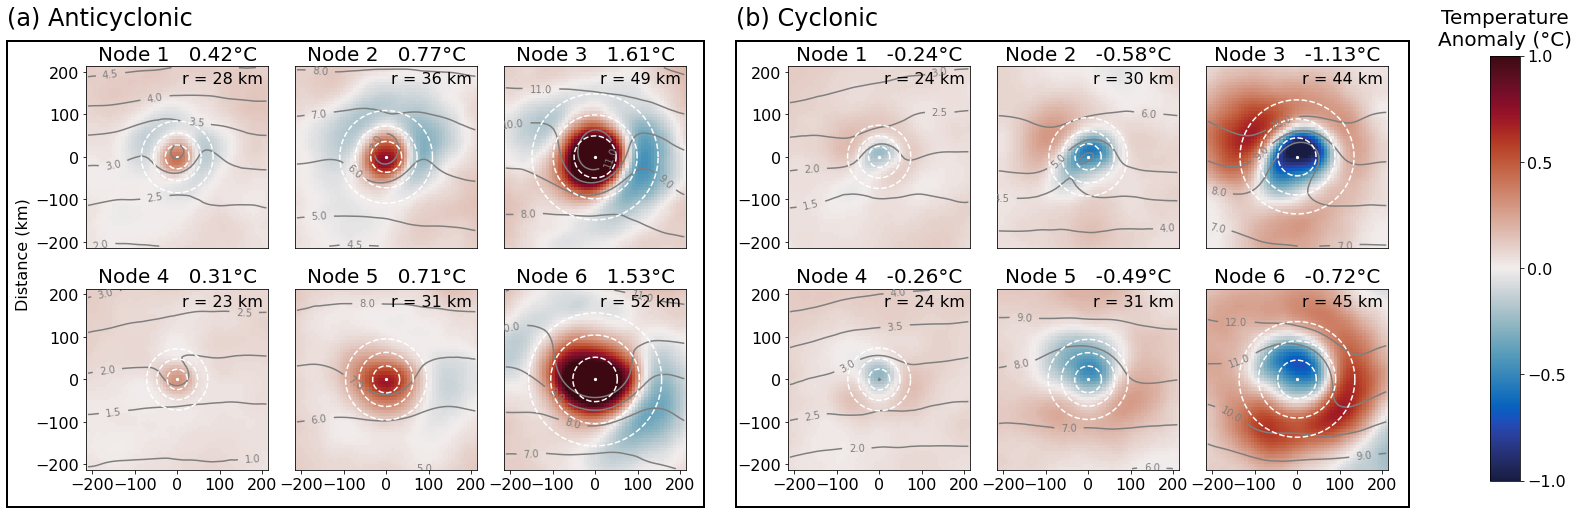

In [125]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 7),facecolor='w')
outer_grid = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

angle = np.linspace(0,2*np.pi,150)

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(2, 3, subplot_spec=outer_grid[i], wspace=0.15, hspace=0.1)
for k in range(6):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            Temp_anomA_3x2[k,0,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -1, vmax= 1
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 1 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    ax.set_title("Node %i   %.2f°C" % (k+1, Temp_anomA_3x2[k,0,:,:].max(('y','x'))),fontsize=20)
    #ax.set_title("Node {:<2d}{:>10.2f}°C".format(k+1, float(Temp_anomA[k,0,:,:].max(('y','x')))))
    
    ax.text(0.97, 0.97, 'r = %i km' %(radA_3x2[k]), transform=ax.transAxes, ha='right', va='top')
    
    #ax.text(0.9, 0.1, 'di = %i%%' %dipoleA[k], transform=ax.transAxes, ha='right', va='top')
    
    
    #CIRCLE 1rad
    x=(radA_3x2[k])*np.cos(angle)
    y=(radA_3x2[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radA_3x2[k])*np.cos(angle)
    y2=2*(radA_3x2[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radA_3x2[k])*np.cos(angle)
    y3=3*(radA_3x2[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,lim_specC, 
                            TempA_3x2[k,0,47-lim:48+lim,47-lim:48+lim],   
                     levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,9,10,11,12,13,14],
#                         ,levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
#        2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the first grid
rect = Rectangle((0.005, 0.005), 0.44, 0.925, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(2, 3, subplot_spec=outer_grid[i], wspace=0.15, hspace=0.1)
for k in range(6):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            Temp_anomC_3x2[k,0,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -1, vmax= 1
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    ax.set_xticks([-200,-100,0,100,200] if row == 1 else [])
    ax.set_title("Node %i   %.2f°C" % (k+1, Temp_anomC_3x2[k,0,:,:].min(('y','x'))),fontsize=20)
    
    ax.text(0.97, 0.97, 'r = %i km' %(radC_3x2[k]), transform=ax.transAxes, ha='right', va='top')
    
    #CIRCLE 1rad
    x=(radC_3x2[k])*np.cos(angle)
    y=(radC_3x2[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radC_3x2[k])*np.cos(angle)
    y2=2*(radC_3x2[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radC_3x2[k])*np.cos(angle)
    y3=3*(radC_3x2[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,lim_specC, 
                    TempC_3x2[k,0,47-lim:48+lim,47-lim:48+lim],  
                     levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,9,10,11,12,13,14],
                   # levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,13,14],
#                         ,levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
#        2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
rect = Rectangle((0.465, 0.005), 0.425, 0.925, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Add colorbar
cbar_ax = fig.add_subplot(outer_grid[2])
cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
                    #label='Temp anomaly °C',
                    shrink=1,aspect=70)
cbar.set_ticks([-1,-0.5, 0.,0.5, 1])
cbar.ax.tick_params(labelsize=16)
cbar_ax.set_title('Temperature\nAnomaly (°C)',pad=10,fontsize=20)
#cbar.set_label('Temp anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(left=0.055)
plt.subplots_adjust(top=0.9)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.96, '(a) Anticyclonic', fontsize=24, fontweight='normal')
fig.text(0.465, 0.96, '(b) Cyclonic', fontsize=24, fontweight='normal')
fig.text(0.01,0.4, 'Distance (km)',rotation='vertical',fontsize=16)


#plt.savefig('.../Temp_surface_SOM3x2_FigureS4.png', dpi=500)

### CONFIG 4x3

In [128]:
x1 = find_ind(lim_spec,-4*np.max(np.concatenate([radC_4x3,radA_4x3])))

x2 = find_ind(lim_spec,4*np.max(np.concatenate([radC_4x3,radA_4x3])))




In [129]:
lim=47-x1

lim_specC = lim_spec[47-lim:48+lim]


In [131]:
#22/6*8

Text(0.015, 0.4, 'Distance (km)')

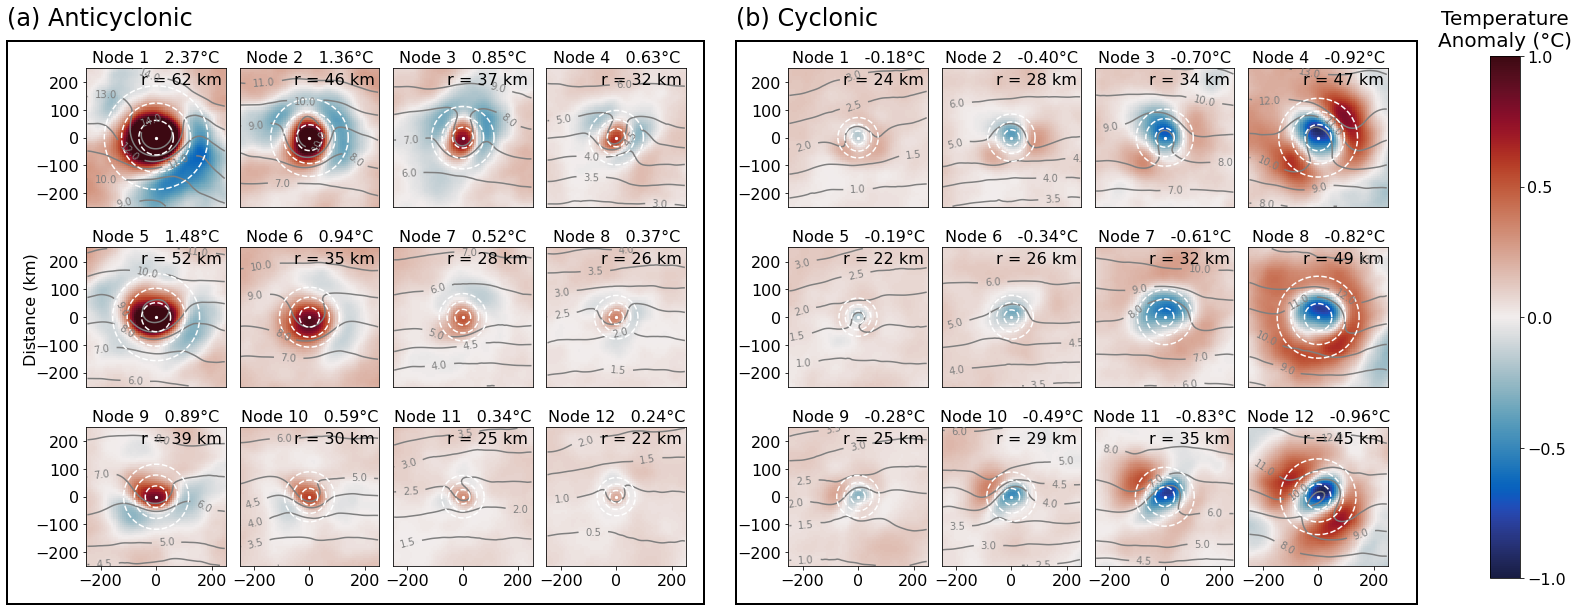

In [133]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 8.5),facecolor='w')
outer_grid = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

angle = np.linspace(0,2*np.pi,150)

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(3, 4, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(12):
    row, col = divmod(k, 4)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            Temp_anomA_4x3[k,0,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -1, vmax= 1
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    #ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    ax.set_xticks([-200,0,200] if row == 2 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    ax.set_title("Node %i   %.2f°C" % (k+1, Temp_anomA_4x3[k,0,:,:].max(('y','x'))),fontsize=16)
    #ax.set_title("Node {:<2d}{:>10.2f}°C".format(k+1, float(Temp_anomA[k,0,:,:].max(('y','x')))))
    
    ax.text(0.97, 0.97, 'r = %i km' %(radA_4x3[k]), transform=ax.transAxes, ha='right', va='top')
    
    #ax.text(0.9, 0.1, 'di = %i%%' %dipoleA[k], transform=ax.transAxes, ha='right', va='top')
    
    
    #CIRCLE 1rad
    x=(radA_4x3[k])*np.cos(angle)
    y=(radA_4x3[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radA_4x3[k])*np.cos(angle)
    y2=2*(radA_4x3[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radA_4x3[k])*np.cos(angle)
    y3=3*(radA_4x3[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,lim_specC, 
                            TempA_4x3[k,0,47-lim:48+lim,47-lim:48+lim],   
                     levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,9,10,11,12,13,14],
#                         ,levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
#        2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the first grid
rect = Rectangle((0.005, 0.005), 0.44, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(3, 4, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.1)
for k in range(12):
    row, col = divmod(k, 4)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lim_specC, lim_specC,  
                            Temp_anomC_4x3[k,0,47-lim:48+lim,47-lim:48+lim]
                            ,vmin = -1, vmax= 1
                            ,cmap = cmo.balance
                            #,levels=levels)
                           ,shading='auto')
    ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-200,-100,0,100,200] if col == 0 else [])
    #ax.set_xticks([-200,-100,0,100,200] if row == 2 else [])
    ax.set_xticks([-200,0,200] if row == 2 else [])
    ax.set_title("Node %i   %.2f°C" % (k+1, Temp_anomC_4x3[k,0,:,:].min(('y','x'))),fontsize=16)
    
    ax.text(0.97, 0.97, 'r = %i km' %(radC_4x3[k]), transform=ax.transAxes, ha='right', va='top')
    
    #CIRCLE 1rad
    x=(radC_4x3[k])*np.cos(angle)
    y=(radC_4x3[k])*np.sin(angle)
    ax.plot(x,y,color='white',linestyle='--')
    
    #CIRCLE 2rad
    x2=2*(radC_4x3[k])*np.cos(angle)
    y2=2*(radC_4x3[k])*np.sin(angle)
    ax.plot(x2,y2,color='white',linestyle='--')

    #CIRCLE 3rad
    x3=3*(radC_4x3[k])*np.cos(angle)
    y3=3*(radC_4x3[k])*np.sin(angle)
    ax.plot(x3,y3,color='white',linestyle='--')
    
    ax.scatter(0,0,marker='o',color='white',s=5)
    
    con = ax.contour(lim_specC,lim_specC, 
                    TempC_4x3[k,0,47-lim:48+lim,47-lim:48+lim],  
                     levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,9,10,11,12,13,14],
                   # levels=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,13,14],
#                         ,levels = [2125,2130,2135, 2140, 2145, 2150, 2155, 2160, 2165, 2170, 2175, 2180, 2185,
#        2190, 2195, 2200, 2205, 2210, 2215, 2220,2225,2230],
                 colors='tab:grey')
    
    ax.clabel(con, inline=True, fontsize=10)
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
rect = Rectangle((0.465, 0.005), 0.43, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Add colorbar
cbar_ax = fig.add_subplot(outer_grid[2])
cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
                    #label='Temp anomaly °C',
                    shrink=1,aspect=70)
cbar.set_ticks([-1,-0.5, 0.,0.5, 1])
cbar.ax.tick_params(labelsize=16)
cbar_ax.set_title('Temperature\nAnomaly (°C)',pad=10,fontsize=20)
#cbar.set_label('Temp anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(left=0.055)
plt.subplots_adjust(top=0.9)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.95, '(a) Anticyclonic', fontsize=24, fontweight='normal')
fig.text(0.465, 0.95, '(b) Cyclonic', fontsize=24, fontweight='normal')
fig.text(0.015,0.4, 'Distance (km)',rotation='vertical',fontsize=16)


#plt.savefig('.../Temp_surface_SOM4x3_FigureS5.png', dpi=500)